In [1]:
import pandas as pd

In [2]:
import matplotlib as plt

In [3]:
excel = pd.read_excel('students_info.xlsx')

In [4]:
ejudge = pd.read_html('results_ejudge.html')[0]

In [5]:
excel

,login,group_faculty,group_out
0,r0300101,1,35
1,r0300102,1,32
2,r0300103,1,32
3,r0300104,1,32
4,r0300105,1,32
...,...,...,...
111,NaN,8,38
112,NaN,8,38
113,NaN,8,38
114,NaN,8,38


In [6]:
ejudge

,Place,User,A,B,C,D,E,F,G,H,Solved,Score
0,1,r0300205,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
1,2,r0300206,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
2,3,r0300508,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139
3,4,r0300314,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
4,5,r0300209,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132
...,...,...,...,...,...,...,...,...,...,...,...,...
124,75-129,r0300806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
125,75-129,r0300812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
126,75-129,s1393305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
127,75-129,s1393410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [18]:
excel_true = excel.loc[excel.login.isnull() == False]

In [19]:
excel_true

,login,group_faculty,group_out
0,r0300101,1,35
1,r0300102,1,32
2,r0300103,1,32
3,r0300104,1,32
4,r0300105,1,32
...,...,...,...
105,r0300807,8,38
106,r0300808,8,38
107,r0300809,8,38
108,r0300810,8,38


In [26]:
excel_logins = excel_true.login

In [28]:
excel_logins

0      r0300101
1      r0300102
2      r0300103
3      r0300104
4      r0300105
         ...   
105    r0300807
106    r0300808
107    r0300809
108    r0300810
109    r0300811
Name: login, Length: 110, dtype: object

In [29]:
data = pd.merge(excel_true, ejudge, how = 'left', right_on = 'User', left_on = 'login')

In [30]:
data

,login,group_faculty,group_out,Place,User,A,B,C,D,E,F,G,H,Solved,Score
0,r0300101,1,35,30,r0300101,10.0,6.0,0.0,NaN,6.0,26.0,NaN,NaN,1,48
1,r0300102,1,32,75-129,r0300102,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,r0300103,1,32,75-129,r0300103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,r0300104,1,32,75-129,r0300104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,r0300105,1,32,75-129,r0300105,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,r0300807,8,38,47-49,r0300807,10.0,8.0,0.0,NaN,2.0,NaN,NaN,NaN,2,20
106,r0300808,8,38,29,r0300808,9.0,3.0,19.0,0.0,NaN,30.0,NaN,NaN,3,61
107,r0300809,8,38,17,r0300809,9.0,NaN,20.0,NaN,20.0,29.0,NaN,NaN,4,78
108,r0300810,8,38,47-49,r0300810,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,20


In [39]:
fac_mean_series = data.groupby('group_faculty').Solved.mean()

In [40]:
fac_mean_series

group_faculty
1    0.588235
2    2.187500
3    1.312500
4    2.214286
5    2.000000
6    1.444444
8    1.181818
Name: Solved, dtype: float64

In [41]:
df_fac_mean = pd.DataFrame({'group_faculty': excel_true.group_faculty.unique(), 'mean_solved': fac_mean_series})

In [42]:
df_fac_mean

,group_faculty,mean_solved
group_faculty,,
1,1,0.588235
2,2,2.187500
3,3,1.312500
4,4,2.214286
5,5,2.000000
6,6,1.444444
8,8,1.181818


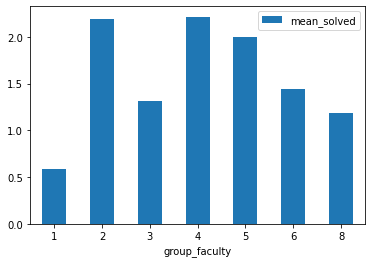

In [43]:
ax = df_fac_mean.plot.bar(x = 'group_faculty', y = 'mean_solved', rot = 0)

In [44]:
out_mean_series = data.groupby('group_out').Solved.mean()

In [45]:
df_out_mean = pd.DataFrame({'group_out': excel_true.group_out.unique(), 'mean_solved': out_mean_series})

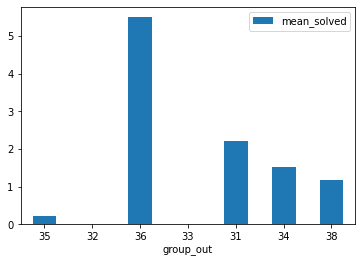

In [46]:
bx = df_out_mean.plot.bar(x = 'group_out', y = 'mean_solved', rot = 0)